Error fetching data from https://nagariknews.nagariknetwork.com/news: 404 Client Error: Not Found for url: https://nagariknews.nagariknetwork.com/news

Top 20 words in news genre:
।: 1001
गते: 756
पुष: 720
२३: 479
:: 332
दर्ता: 232
निर्वाचन: 228
उम्मेदवारी: 223
सभा: 221
राष्ट्रिय: 179
मनोनयन: 162
२२: 152
राष्ट्रियसभा: 146
तथा: 133
अध्यक्ष: 132
उम्मेदवार: 130
सदस्य: 125
जना: 121
नेपाली: 120
गरे: 118


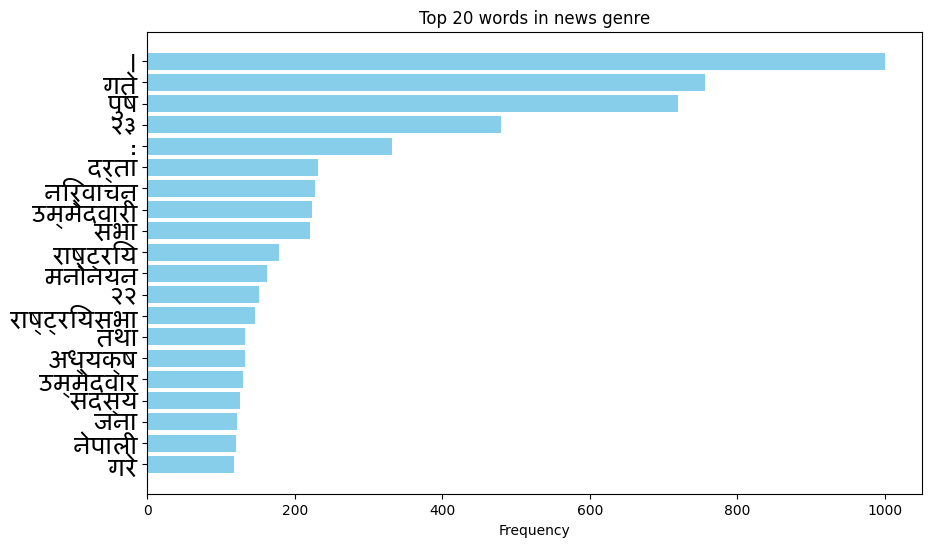


Top 20 words in opinion genre:
गते: 848
।: 586
मंसिर: 430
पुष: 319
:: 200
?२०८०: 135
१५: 99
निर्वाचन: 98
गर्ने: 94
कात्तिक: 81
सभा: 78
३: 78
राजनीतिक: 77
वर्ष: 72
तथा: 71
रूपमा: 67
दिन: 66
७: 62
विभिन्न: 62
२६: 58


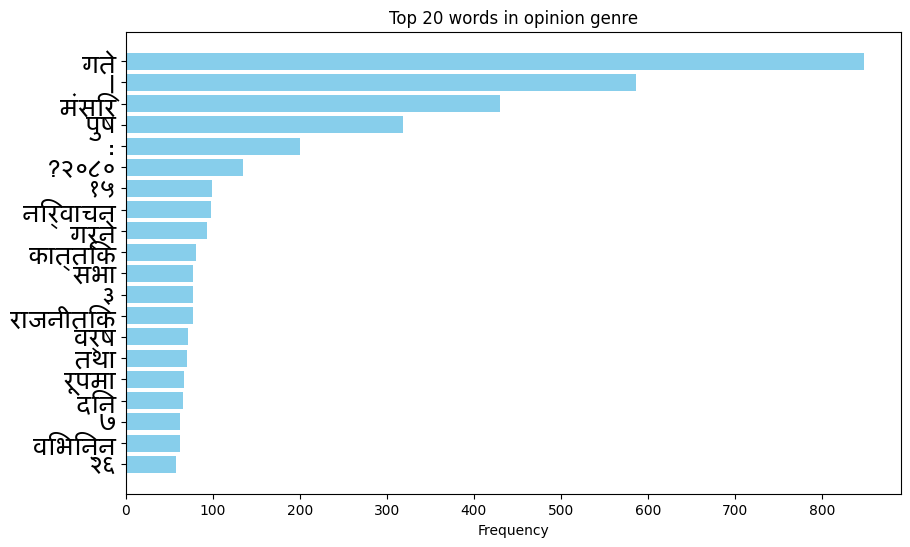

In [4]:
import requests
from bs4 import BeautifulSoup
from collections import Counter, defaultdict
import datetime

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Set the font for matplotlib
font_prop = FontProperties(fname='Mangal.ttf', size=18)

# Reading stopwords from the given stopword file
with open("stopwords01.txt", "r", encoding="utf-8") as stopwords_file:
    nepali_stopwords = set(stopwords_file.read().split())

# Listing our websites from which we want to scrape
websites = [
    "https://www.ratopati.com/category/news",  # news
    "https://nagariknews.nagariknetwork.com/news",  # news
    "https://www.onlinekhabar.com/content/news",  # news
    "https://ekantipur.com/news",  # news
    "https://www.onlinekhabar.com/content/opinion",
    "https://www.ratopati.com/category/opinion",  # opinion
]

# Keywords and search timeframe
keywords = {"समाचार", "आम निर्वाचन २०७९", "विचार", "राजनीति"}
start_date = datetime.date(2022, 9, 1)
end_date = datetime.date(2022, 10, 31)

# To store the genre-specific data separately in genre_data and complete data in corpus_data
genre_data = defaultdict(dict)
corpus_data = defaultdict(list)

# To scrape data from each website
for website in websites:
    genre = website.split("/")[-1]  # Extract genre from URL

    try:
        # To get page content using BeautifulSoup
        response = requests.get(website)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "lxml")

        # Extracting all elements on the page
        elements = soup.find_all()

        # Processing each element
        for element in elements:
            # Get text, remove stopwords, and update genre data
            text = element.get_text(strip=True)
            text = " ".join([word for word in text.split() if word not in nepali_stopwords])

            # Check if the element contains any of the specified keywords
            if any(keyword in text for keyword in keywords):
                # Add text to genre-specific corpus data
                corpus_data[genre].append(text)

                # Add genre-specific key if it doesn't exist in genre_data[genre]
                if 'all' not in genre_data[genre]:
                    genre_data[genre]['all'] = Counter()

                genre_data[genre]['all'].update(text.split())

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {website}: {e}")

# Print the top 20 words for each genre and plot
for genre, genre_word_freq in genre_data.items():
    print(f"\nTop 20 words in {genre} genre:")
    top_20_words = genre_word_freq['all'].most_common(20)
    for word, frequency in top_20_words:
        print(f"{word}: {frequency}")

    # Plotting the top 20 words
    words = [word for word, _ in top_20_words]
    frequencies = [frequency for _, frequency in top_20_words]

    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top 20 words in {genre} genre')
    plt.yticks(fontproperties=font_prop)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()
